# ■ DTM & TF-IDM 실습 

사이킷런 참조 사이트

### ▶ CountVectorizer: 
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

- 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩 벡터를 생성
- 다음과 같은 세가지 작업을 수행

 (1) 문서를 토큰 리스트로 변환  
 
 (2) 각 문서에서 토큰의 출현 빈도를 카운팅   
 
 (3) 각 문서를 BOW 인코딩 벡터로 변환   
 

### ▶ TfidfVectorizer:
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

- CountVectorizer와 유사 작업 수행하지만 TF-IDF 방식으로 단어의 가중치를 조정한 BOW 인코딩 벡터를 생성

In [1]:
## 기본 패키지 가져오기 

import numpy as np                    # numpy 패키지 가져오기
import pandas as pd                   # pandas 패키지 가져오기
import matplotlib.pyplot as plt       # 시각화 패키지 가져오기

from konlpy.tag import Kkma 
from konlpy.tag import Okt 

from wordcloud  import WordCloud

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer



import warnings
warnings.filterwarnings('ignore')



### ▶ Sklearn 의 CountVectorizer 사용하기
    

In [17]:
# Example 말뭉치 
#한 줄을 문서라고 보면 된다. 총 4개의 문서인 것

corpus = [
    'you know I want you I love you',
    'I like you',
    'what should I do ', 
    'This is a document'     
]

# CountVectorizer 객체 만들기

c_vector = CountVectorizer()    # default: 길이가 2 이상인 단어만 추출  & 띄어쓰기를 기준으로 함 - 위에서 I 는 계산에서 제외 
#영어 중심이기 때문에 길이가 2인 단어 기준임.
#띄어쓰기 기준으로 토큰화해서 한국어에는 맞지 않음.
#I는 카운트에서 제외된다. (기본값)

# fit_transform method: DTM 을 생성하는 method

print(c_vector.fit_transform(corpus))
print() 

# 위 결과의 출력의 의미 
# (0, 10)  3    : 0번째 행의 10번 인덱스 값이 3 이라는 의미 
# (1, 10)  1    : 1번째 행의 10번 인덱스 값이 1 이라는 의미 
# (2, 0)   1    : 2번째 행의 0번 인덱스 값이 1 이라는 의미 
# (3, 7)   1    : 3번째 행의 7번 인덱스 값이 1이라는 의미 
# 길이가 2인 단어만 추출하므로 영어 단어 I 는 제외함 

# 위의 출력 방식은 가독성이 떨어지므로 행렬로 변환하여 출력함 

print(c_vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록하고, 행렬로 변환 
print()


  (0, 10)	3
  (0, 3)	1
  (0, 8)	1
  (0, 5)	1
  (1, 10)	1
  (1, 4)	1
  (2, 9)	1
  (2, 6)	1
  (2, 0)	1
  (3, 7)	1
  (3, 2)	1
  (3, 1)	1

[[0 0 0 1 0 1 0 0 1 0 3]
 [0 0 0 0 1 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 0 0 1 0]
 [0 1 1 0 0 0 0 1 0 0 0]]



In [18]:
# get_feature_names(): 출현 단어를 추출하는 메소드 

print('▶ 출현 단어: ', c_vector.get_feature_names())    
print()


▶ 출현 단어:  ['do', 'document', 'is', 'know', 'like', 'love', 'should', 'this', 'want', 'what', 'you']



In [19]:
# vocabulary_ 메소드는 각 단어의 인덱스가 어떻게 부여되었는지를 보여줌 
# 문서에 먼저 나온 단어부터 보여 주고 알파벳 순으로 인덱스를 부여함 
 

print(c_vector.vocabulary_)  # (단어 & 단어 인덱스값) 의 pair 형태로 단어 사전이 출력됨  
print()

type(c_vector.vocabulary_)  # c_vector.vocabulary_ 의 데이터 타입을 확인 



{'you': 10, 'know': 3, 'want': 8, 'love': 5, 'like': 4, 'what': 9, 'should': 6, 'do': 0, 'this': 7, 'is': 2, 'document': 1}



dict

In [20]:
# 아래 코드를 이용하여 index 순서대로 어느 단어가 있는지를 확인 할 수 있음 =====================================


reverse_dict = dict(map(reversed, c_vector.vocabulary_.items()))   # 단어와 index 위치를 바꾸어 줌 

print(reverse_dict)      
print()

print(dict(sorted(reverse_dict.items())))   # index 순서대로 sorting 후 출력 
print()



{10: 'you', 3: 'know', 8: 'want', 5: 'love', 4: 'like', 9: 'what', 6: 'should', 0: 'do', 7: 'this', 2: 'is', 1: 'document'}

{0: 'do', 1: 'document', 2: 'is', 3: 'know', 4: 'like', 5: 'love', 6: 'should', 7: 'this', 8: 'want', 9: 'what', 10: 'you'}



### ▶ Sklearn 의 TfidfVectorizer 사용하기
- TF-IDF(Term Frequency – Inverse Document Frequency) 인코딩은 모든 문서에 공통적으로 들어있는 단어의 경우 문서 구별 능력이 떨어진다고 보아 가중치를 축소함 

In [21]:
# TfidfVectorizer 객체 만들기 & Tf-IDF 값을 계산하기 

tfidfvector = TfidfVectorizer()    # TfidfVectorizer 객체 만들기 

print(tfidfvector.fit_transform(corpus)) 
print()


print(tfidfvector.fit_transform(corpus).toarray())  # 코퍼스로부터 각 단어의 Tf-IDF 값을 계산하고, 행렬로 변환 
print()


  (0, 5)	0.34110955522812525
  (0, 8)	0.34110955522812525
  (0, 3)	0.34110955522812525
  (0, 10)	0.8068040741073459
  (1, 4)	0.7852882757103967
  (1, 10)	0.6191302964899972
  (2, 0)	0.5773502691896257
  (2, 6)	0.5773502691896257
  (2, 9)	0.5773502691896257
  (3, 1)	0.5773502691896257
  (3, 2)	0.5773502691896257
  (3, 7)	0.5773502691896257

[[0.         0.         0.         0.34110956 0.         0.34110956
  0.         0.         0.34110956 0.         0.80680407]
 [0.         0.         0.         0.         0.78528828 0.
  0.         0.         0.         0.         0.6191303 ]
 [0.57735027 0.         0.         0.         0.         0.
  0.57735027 0.         0.         0.57735027 0.        ]
 [0.         0.57735027 0.57735027 0.         0.         0.
  0.         0.57735027 0.         0.         0.        ]]



In [22]:
# get_feature_names(): 출현 단어를 추출하는 메소드 
# vocabulary_ 메소드는 각 단어의 인덱스가 어떻게 부여되었는지를 보여줌 
# 문서에 먼저 나온 단어부터 보여 주고 알파벳 순으로 인덱스를 부여함 

print('▶ 출현 단어: ', tfidfvector.get_feature_names())  # 출현 단어를 추출 
print()

print(tfidfvector.vocabulary_)      # (단어 & 단어 인덱스값) 의 pair 형태로 단어 사전이 출력됨  
print()


▶ 출현 단어:  ['do', 'document', 'is', 'know', 'like', 'love', 'should', 'this', 'want', 'what', 'you']

{'you': 10, 'know': 3, 'want': 8, 'love': 5, 'like': 4, 'what': 9, 'should': 6, 'do': 0, 'this': 7, 'is': 2, 'document': 1}



## ■ (실습 1) 뉴스 데이터 처리

In [23]:
# 실습용 데이터 읽어 오기

news = pd.read_csv("실습용 샘플뉴스(small amount).csv")


# 데이터 크기 확인 

news.shape


(5, 5)

In [24]:
# info() 함수 : 데이터에 대한 전반적인 정보를 표시
# Data를 구성하는 행과 열의 크기, 컬럼명, 컬럼을 구성하는 값의 자료형 등을 출력


news.info() 

#어떤 파일을 읽으면 습관적으로 info()하기



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5 non-null      object
 1   text    5 non-null      object
 2   url     5 non-null      object
 3   media   5 non-null      object
 4   date    5 non-null      object
dtypes: object(5)
memory usage: 328.0+ bytes


In [25]:
# 데이터 칼럼(feature)  확인하기 

news.keys()

#파일 읽으면 기본으로 하기

Index(['title', 'text', 'url', 'media', 'date'], dtype='object')

In [26]:
# 데이터 앞 부분 확인하기 

news.head()
#얘도기본

,title,text,url,media,date
0,방역 2.5단계 뒤 을씨년스럽게 변한 '스벅'···별천지된 '파바',서울의 밤이 달라졌다. 수도권을 대상으로 이른바 ‘사회적 거리두기 2.5단계’가 시...,https://news.naver.com/main/read.nhn?mode=LPOD...,중앙일보,2020-08-31
1,"""기적 같은 선방""이라지만...현장은 성한 곳이 없다","“50년 동안 사업하면서 소위 ‘깡통’을 세 번 차고도 재기했는데, 이번 위기는 정...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-03
2,13일까지 장맛비… 사흘간 물폭탄 사망·실종 25명,곳곳 수해 초비상 \r\n\r\n 3일 오전 충남 천안과 아산지역에 호우경보가...,https://news.naver.com/main/read.nhn?mode=LPOD...,세계일보,2020-08-04
3,최악 장마에 태풍까지… 내일까지 최고 300㎜,예측하기 어려운 ‘물폭탄’을 동반한 장마가 유례없이 길어지고 있다. 설상가상으로 9...,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-08-10
4,은행 예금금리 사상 첫 0%대,대출금리도 2.72% 사상최저\r\n\r\n\r\n\r\n\t\t\t\t은행 예금에...,https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-08-01


In [27]:
# 데이터 끝 부분 확인하기 - 전체 데이터 행이 total 5개 행이라서 위 head()와 결과가 동일함 

news.tail()


,title,text,url,media,date
0,방역 2.5단계 뒤 을씨년스럽게 변한 '스벅'···별천지된 '파바',서울의 밤이 달라졌다. 수도권을 대상으로 이른바 ‘사회적 거리두기 2.5단계’가 시...,https://news.naver.com/main/read.nhn?mode=LPOD...,중앙일보,2020-08-31
1,"""기적 같은 선방""이라지만...현장은 성한 곳이 없다","“50년 동안 사업하면서 소위 ‘깡통’을 세 번 차고도 재기했는데, 이번 위기는 정...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-03
2,13일까지 장맛비… 사흘간 물폭탄 사망·실종 25명,곳곳 수해 초비상 \r\n\r\n 3일 오전 충남 천안과 아산지역에 호우경보가...,https://news.naver.com/main/read.nhn?mode=LPOD...,세계일보,2020-08-04
3,최악 장마에 태풍까지… 내일까지 최고 300㎜,예측하기 어려운 ‘물폭탄’을 동반한 장마가 유례없이 길어지고 있다. 설상가상으로 9...,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-08-10
4,은행 예금금리 사상 첫 0%대,대출금리도 2.72% 사상최저\r\n\r\n\r\n\r\n\t\t\t\t은행 예금에...,https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-08-01


In [28]:
# 전체 내용 중 'text' 컬럼(열) 의 내용을 확인 - 'text' 컬럼(열)은 신문 기사 본문에 해당 

news['text']


0    서울의 밤이 달라졌다. 수도권을 대상으로 이른바 ‘사회적 거리두기 2.5단계’가 시...
1    “50년 동안 사업하면서 소위 ‘깡통’을 세 번 차고도 재기했는데, 이번 위기는 정...
2    곳곳 수해 초비상 \r\n\r\n    3일 오전 충남 천안과 아산지역에 호우경보가...
3    예측하기 어려운 ‘물폭탄’을 동반한 장마가 유례없이 길어지고 있다. 설상가상으로 9...
4    대출금리도 2.72% 사상최저\r\n\r\n\r\n\r\n\t\t\t\t은행 예금에...
Name: text, dtype: object

In [29]:

print(news['text'][0])  # 0번째 행의 text 컬럼 전체 내용을 확인 


서울의 밤이 달라졌다. 수도권을 대상으로 이른바 ‘사회적 거리두기 2.5단계’가 시행되면서 음식점 등이 오후 9시에 대거 문을 닫았기 때문이다.  
 
   2.5단계 시행 첫날인 이날 서울 중심가의 식당과 술집 등은 매장 내 취식 금지 시작 시각인 오후 9시를 전후로 속속 장사를 접었다. 한식집 등 식사 위주의 식당은 해가 지면서 일찌감치 마감했고, 고깃집이나 횟집·이자카야·맥줏집 등도 ‘데드라인’이 임박하자 손님을 내보내고 매장을 정리하기 시작했다. 평소라면 간판 불빛으로 불야성이었을 번화가 골목들이 깜깜해질 정도였다.  
 
   서울 종각역 인근 맥줏집 사장 김모(30)씨는 오후 8시50분이 되자 손님들에게 “오후 9시 마감이니 나가 달라”고 부탁했다. 이 가게의 평소 영업시간은 오후 5시부터 다음 날 오전 2시까지였다. 김씨는 “원래 가장 붐비는 시간인데 문을 닫아야 한다. 코로나19 때문에 매출액이 예년의 4분의 1로 줄었는데 이젠 그 반토막도 안 될 것 같다”고 한숨을 내쉬었다.  
 
              오후 9시쯤 한 식당에서 나온 최모(22)씨는 “친구들과의 약속 때문에 나왔는데 강제로 이 시간에 귀가해야 한다니 아쉽다”고 말했다. 4층 규모의 한 대형 술집은 ‘2.5단계’가 시행되는 다음 달 6일까지 아예 문을 닫기로 했다. 이 술집 사장은 “오후 9시까지만 영업하라는 건 그냥 술집 문을 닫으라는 이야기”라며 “포장, 배달은 가능하다지만 누가 술집에서 술이나 안주를 배달시켜 먹겠나”라고 말했다. 서울역 대합실 내 한식당 등도 오후 9시 이전에 문을 닫았다. 패스트푸드 가게도 일부 포장 주문 손님만 눈에 보일 뿐 한산했다.  
 
   서울 중구의 한 순댓국집 사장 홍정복(60)씨는 “원래 오후 9시에서 오전 1시 사이의 매출이 전체의 30%를 차지한다”며 “매출액이 줄어 아쉽지만, 많이들 동참해 최대한 빨리 코로나19가 잠잠해지길 바란다”고 말했다.  
 
   업종별로 희비가 갈리기도 했다. 온종일 포장·배달 판매만 가능한 프랜차이즈

In [30]:

okt = Okt()  # 한글 형태소 분석기 불러오기 (i.e. 실행을 위한 객체 만들기)   
#코코마는 두 배 수준으로 시간이 오래걸림, 실제로 사용하기 위해서는 코코마 추천

# 두 음절 이상의 명사만 추출하는 함수를 정의 =============================

def tokenizer(text):
    nouns = okt.nouns(text)    # 해당 칼럼에서 명사만 추출 
    return [noun for noun in nouns if len(noun) > 1]    # 두 음절 이상의 명사만 다시 추출하여 반환  



In [31]:
# CountVectorizer 함수는 tokenizer 함수를 매개변수로 지정 가능함

count_vectorizer = CountVectorizer(tokenizer=tokenizer)   

# 5개 컬럼 중에서 처리 대상 컬럼은 'text' 컬럼 (신문기사 본문) 
# fit method 는 전체 문서의 'text' 칼럼에 등장한 모든 단어들의 리스트를 만들고 단어마다 인덱스를 부여함

count_vectorizer.fit(news['text'])


# 위의 fit 메소드를 이용해 구한 단어를 처음부터 20개의 단어를 출력하고 확인
print('▶ 처음부터 20개의 단어를 출력 = \n', count_vectorizer.get_feature_names()[: 20])   
print()

print(count_vectorizer.vocabulary_)    # (단어 & 단어 인덱스값) 의 pair 형태로 단어 사전이 출력됨  
print()



▶ 처음부터 20개의 단어를 출력 = 
 ['가건물', '가게', '가계', '가공', '가구', '가까이', '가동', '가량', '가빈', '가운데', '가의', '가장', '가족', '가중', '가평', '가평군', '가평읍', '각별', '각종', '간판']

{'서울': 362, '수도권': 394, '대상': 171, '사회': 344, '거리': 40, '두기': 202, '단계': 152, '시행': 420, '음식점': 534, '오후': 493, '대거': 163, '때문': 207, '첫날': 708, '중심': 663, '가의': 10, '식당': 421, '술집': 406, '매장': 223, '취식': 736, '금지': 100, '시작': 418, '시각': 411, '전후': 616, '장사': 592, '한식': 808, '식사': 422, '위주': 521, '지면': 676, '감치': 25, '마감': 212, '고깃집': 64, '횟집': 846, '이자카야': 546, '맥줏집': 225, '데드라인': 186, '임박': 571, '손님': 386, '정리': 624, '평소': 774, '라면': 209, '간판': 19, '불빛': 316, '불야성': 317, '번화가': 277, '골목': 69, '깜깜': 124, '정도': 623, '종각역': 645, '인근': 554, '사장': 342, '김모': 120, '달라': 153, '부탁': 301, '가게': 1, '영업': 478, '시간': 412, '다음': 150, '오전': 489, '김씨': 121, '원래': 515, '가장': 11, '코로나': 745, '매출': 224, '예년': 482, '반토막': 259, '한숨': 807, '최모': 722, '친구': 737, '약속': 450, '강제': 31, '귀가': 88, '규모': 89, '대형': 183, '아예': 445, '그냥': 91, '이야기': 544, '라며': 208, '

In [32]:

print('▶ 사용된 전체 단어 수 = ', len(list(count_vectorizer.vocabulary_)))     # 문서에서 사용된 전체 단어 수를 확인 
print()

print(list(count_vectorizer.vocabulary_)[: 100])    # 전체 단어를 list 타입으로 변환한 후 100개만 선택 출력 


▶ 사용된 전체 단어 수 =  854

['서울', '수도권', '대상', '사회', '거리', '두기', '단계', '시행', '음식점', '오후', '대거', '때문', '첫날', '중심', '가의', '식당', '술집', '매장', '취식', '금지', '시작', '시각', '전후', '장사', '한식', '식사', '위주', '지면', '감치', '마감', '고깃집', '횟집', '이자카야', '맥줏집', '데드라인', '임박', '손님', '정리', '평소', '라면', '간판', '불빛', '불야성', '번화가', '골목', '깜깜', '정도', '종각역', '인근', '사장', '김모', '달라', '부탁', '가게', '영업', '시간', '다음', '오전', '김씨', '원래', '가장', '코로나', '매출', '예년', '반토막', '한숨', '최모', '친구', '약속', '강제', '귀가', '규모', '대형', '아예', '그냥', '이야기', '라며', '포장', '배달', '누가', '안주', '서울역', '대합실', '한식당', '이전', '패스트푸드', '일부', '주문', '중구', '국집', '정복', '사이', '전체', '차지', '동참', '최대한', '업종', '별로', '희비', '갈리']


In [22]:
#  index 순서대로 어느 단어가 있는지를 확인  =====================================


reverse_dict = dict(map(reversed, count_vectorizer.vocabulary_.items()))


print(dict(sorted(reverse_dict.items())))



{0: '가건물', 1: '가게', 2: '가계', 3: '가공', 4: '가구', 5: '가까이', 6: '가동', 7: '가량', 8: '가빈', 9: '가운데', 10: '가의', 11: '가장', 12: '가족', 13: '가중', 14: '가평', 15: '가평군', 16: '가평읍', 17: '각별', 18: '각종', 19: '간판', 20: '갈등', 21: '갈리', 22: '감당', 23: '감소', 24: '감염증', 25: '감치', 26: '강물', 27: '강수', 28: '강수량', 29: '강원', 30: '강원영동', 31: '강제', 32: '강타', 33: '강풍', 34: '강화', 35: '개선', 36: '개월', 37: '개인', 38: '거란', 39: '거래', 40: '거리', 41: '거창', 42: '걱정', 43: '건물', 44: '건설', 45: '건의', 46: '게릴라', 47: '격리', 48: '격상', 49: '결과', 50: '결혼식', 51: '경기', 52: '경기도', 53: '경남', 54: '경보', 55: '경북', 56: '경신', 57: '경영', 58: '경제', 59: '경제성장률', 60: '계기', 61: '계속', 62: '계좌', 63: '고객', 64: '고깃집', 65: '고용', 66: '고통지수', 67: '곡성군', 68: '곤두박질', 69: '골목', 70: '곳곳', 71: '공단', 72: '공인', 73: '공장', 74: '과거', 75: '관계자', 76: '관광', 77: '관련', 78: '관리', 79: '광주', 80: '광주시', 81: '교량', 82: '교수', 83: '교통체증', 84: '구조해', 85: '국가', 86: '국내', 87: '국집', 88: '귀가', 89: '규모', 90: '규제', 91: '그냥', 92: '근거', 93: '근로자', 94: '근무', 95: '금고', 96: '금도', 97: '금리', 98

In [33]:
# fit_transform method을 이용하여 DTM 을 생성


count_matrix = count_vectorizer.fit_transform(news['text'])       # 처리 시간이 소요됨

count_matrix


<5x854 sparse matrix of type '<class 'numpy.int64'>'
	with 1050 stored elements in Compressed Sparse Row format>

In [34]:
# 결과를 array로 변환 


# count_vectorizer.fit_transform(news['text']).toarray()

count_matrix.toarray() #한꺼번에 바꿀때


array([[0, 2, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 4, ..., 0, 0, 0]], dtype=int64)

In [35]:
# 전체 형태를 확인 

count_matrix.toarray().shape


(5, 854)

In [36]:
# 0 번째 행의 형태를 확인 


count_matrix[0].toarray().shape

#지금 어레이라서 컴퓨터가 알 수 있게 바꾸어주어야 한다. 2차원으로 주면 못알아먹어서 flat하게 해주어야 한다. 

(1, 854)

In [27]:
# word cloud 함수는 입력을 리스트 형식으로 받음 - array 형태로 입력 받을 수 없음 - array 형식을 list 형식으로 바꾸어 주어야 함 
# 
# squeeze 함수는 차원 중 길이가 1인 차원을 찾아 해당 차원을 제거한다.

print(count_matrix[0].toarray().squeeze()) 
print() 

count_matrix[0].toarray().squeeze().shape



[ 0  2  0  0  0  0  0  0  1  0  1  1  1  0  0  0  0  0  0  1  0  1  0  0
  0  1  0  0  0  0  0  1  0  0  1  0  0  2  0  0  3  0  0  0  0  0  0  0
  0  0 10  0  3  0  0  0  0  0  0  0  1  0  2  7  1  0  0  0  0  1  0  0
  0  0  0  1  0  0  1  0  1  0  0  1  0  0  0  1  1  2  0  1  0  0  0  0
  0  0  0  0  3  0  0  0  1  0  1  0  0  0  0  0  0  1  0  1  0  0  0  0
  2  1  0  1  1  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0
  1  0  0  0  1  1  2  0  3  2  1  0  0  0  1  1  0  0  1  1  0  0  0  0
  2  1  0  2  0  0  1  0  0  0  0  1  0  1  0  1  2  0  1  0  0  0  0  0
  0  0  1  0  0  0  1  0  0  0  2  0  0  2  0  5  2  1  0  1  2  0  0  1
  0  0  1  0  0  0  0  5  3  2  0  0  0  0  0  0  0  0  1  1  0  0  0  1
  0  0  1  1  0  1  0  0  0  1  0  1  1  1  0  0  0  0  0  1  3  0  0  0
  0  1  0  1  1  2  0  1  3  1  0  0  1  1  0  0  0  0  0  0  1  1  0  0
  0  0  0  2  1  0  1  0  0  1  2  0  0  1  0  0  0  0  1  0  0  1  0  0
  0  1  0  1  1  1  0  0  0  0  0  0  0  0  0  0  0

(854,)

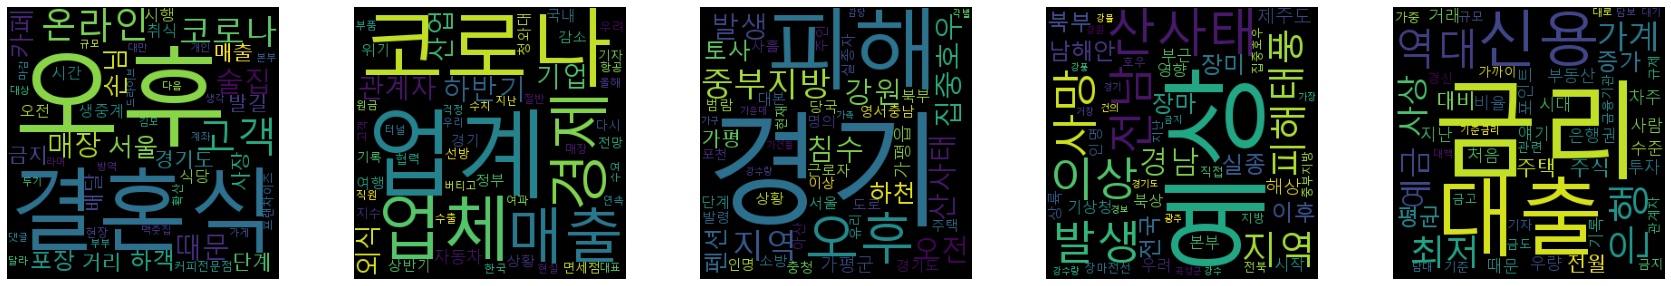

In [37]:

wordcloud = WordCloud(
    font_path="C:/windows/fonts/malgun.ttf", # 폰트 경로
    width = 300, 
    height = 300,
    max_words=50,
#     background_color="white"
)


plt.figure(figsize=(30,5))

for index in range(5) :
    value = count_matrix[index].toarray().squeeze()
    key = count_vectorizer.get_feature_names()
    score = dict(zip(key, value))
    
    cloud = wordcloud.generate_from_frequencies(score)
    plt.subplot(1, 5, index+1)
    plt.imshow(cloud)
    plt.axis('off')


## ■ (실습 2) 용량이 큰 텍스트 데이터 처리하기

In [2]:
# 텍스트 데이터를 판다스로 읽어 오기, 다음 시간 실습

news2 = pd.read_csv("실습용 샘플뉴스(bulk).csv") 

news2.shape


(10000, 5)

In [3]:

news2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   10000 non-null  object
 1   text    10000 non-null  object
 2   url     10000 non-null  object
 3   media   10000 non-null  object
 4   date    10000 non-null  object
dtypes: object(5)
memory usage: 390.8+ KB


In [4]:
# 데이터 칼럼  확인하기 

news2.keys()   


Index(['title', 'text', 'url', 'media', 'date'], dtype='object')

In [5]:
# 데이터 앞 부분 확인하기 

news2.head()

,title,text,url,media,date
0,"[바로잡습니다] ""美 FDA 한국 진단키트 사전승인에 관한 외교부 보도자료"" 관련",본지는 3월 30일 자 '美FDA 한국 진단키트 사전승인? 알고보니 외교부의 '가짜...,https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-06-10
1,"[바로잡습니다] 8일 자 A29면 '전성철의 제언, 참여연대보다 '풀뿌리 회원' 더...","▲8일 자 A29면 '전성철의 제언, 참여연대보다 '풀뿌리 회원' 더 많은 싱크탱크...",https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-06-10
2,"경제난 北의 두 노림수… 안으론 주민단속, 文정부엔 '제재 허물라'","北, 전단금지법 약속에도 대남비방 수위 높여… 왜 이러나\n\n\n \n대북 전단 ...",https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-06-10
3,"이와중에… 여권 ""판문점 선언 국회 비준해야""",北 향한 유감 표명 전혀 없어… 靑은 남북 통신선 차단에 침묵\n\n\n\t\t\t...,https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-06-10
4,"北, 신형미사일 쏘거나 국지도발할 수도",다음 조치로 개성공단 철거하고 9·19 군사합의 폐기 나설 가능성\n\n\n\t\t...,https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-06-10


In [6]:
# 데이터 끝 부분 확인하기 

news2.tail()


,title,text,url,media,date
9995,"운명의 1주일, 수도권 2000만에 달렸다","지난 2주간 2단계, 코로나 확산세 안꺾여… 정부 ""국민 협력 필요""\n\n\n\t...",https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-08-31
9996,"민주당 대표 이낙연 ""기필코 정권 재창출""","60% 득표, 176석 巨與 수장에 ""文대통령께 드릴 말씀 드릴것""\n\n\n\n\...",https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-08-31
9997,"[팔면봉] 與 선장 된 이낙연, 靑엔 할 말 하고 野와 협치하고 코로나 이겨 정권 ...","○與 선장 된 이낙연, 靑엔 할 말 하고 野와 협치하고 코로나 이겨 정권 재창출하겠...",https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-08-31
9998,"세계 첫 반도체복합기지, D램으로 포문 열었다",[오늘의 세상]\n\n\n\t\t\t\t삼성전자가 30일 세계 최대 규모인 평택 반...,https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-08-31
9999,"""파운드리는 대만이 우세… 삼성, AI 반도체로 기습하라""",[오늘의 세상] 매주 월요일은 'Mint 경제'\n\n\n\t\t\t\t미·중 테크...,https://news.naver.com/main/read.nhn?mode=LPOD...,조선일보,2020-08-31


In [7]:

# 전체 내용 중 'text' 컬럼(열) 의 내용을 확인 - 'text' 컬럼(열)은 신문 기사 본문에 해당 

news2['text']



0       본지는 3월 30일 자 '美FDA 한국 진단키트 사전승인? 알고보니 외교부의 '가짜...
1       ▲8일 자 A29면 '전성철의 제언, 참여연대보다 '풀뿌리 회원' 더 많은 싱크탱크...
2       北, 전단금지법 약속에도 대남비방 수위 높여… 왜 이러나\n\n\n \n대북 전단 ...
3       北 향한 유감 표명 전혀 없어… 靑은 남북 통신선 차단에 침묵\n\n\n\t\t\t...
4       다음 조치로 개성공단 철거하고 9·19 군사합의 폐기 나설 가능성\n\n\n\t\t...
                              ...                        
9995    지난 2주간 2단계, 코로나 확산세 안꺾여… 정부 "국민 협력 필요"\n\n\n\t...
9996    60% 득표, 176석 巨與 수장에 "文대통령께 드릴 말씀 드릴것"\n\n\n\n\...
9997    ○與 선장 된 이낙연, 靑엔 할 말 하고 野와 협치하고 코로나 이겨 정권 재창출하겠...
9998    [오늘의 세상]\n\n\n\t\t\t\t삼성전자가 30일 세계 최대 규모인 평택 반...
9999    [오늘의 세상] 매주 월요일은 'Mint 경제'\n\n\n\t\t\t\t미·중 테크...
Name: text, Length: 10000, dtype: object

In [8]:

print(news2['text'][7000])  # 7000번째 행의 text 컬럼 전체 내용을 확인 


[경향신문] 



MS ‘엑스박스 게임’ 지원 
스마트폰으로 클라우드 속  
게임 100여종 즐길 수 있어 
블루투스 컨트롤러도 별매 

삼성전자가 업무용 PC 수준의 생산성과 고사양 게임에 최적화된 5세대(5G) 이동통신용 스마트폰 ‘갤럭시노트20’ 모델 2종을 공개했다. 또 접었다 펼 수 있는 폴더블폰의 명맥을 이어갈 ‘갤럭시Z폴드2’도 선보였다. 경쟁사인 애플이 아직 5G·폴더블폰을 내놓지 않은 상황에서 지난 1년간 잇따라 이 분야 신제품을 내놓으며 ‘초격차 전략’을 펼치는 모양새다. 올 상반기 코로나19 여파로 프리미엄폰 판매가 부진했던 삼성전자가 하반기에 반전 기회를 만들 수 있을지 주목된다.  | 관련기사 16면

삼성전자는 5일 온라인으로 ‘갤럭시 언팩(신제품 출시) 2020’ 행사를 열고 스마트폰 최초로 마이크로소프트(MS) ‘엑스박스 게임 패스’를 지원하는 갤럭시노트20 기본·울트라 모델을 공개했다. 엑스박스는 집 안에서 TV나 모니터에 연결해서 하는 콘솔 게임기로, 이제 갤럭시노트20이 있으면 비싼 게임기를 사지 않아도 클라우드에 접속해 100여종의 게임을 즐길 수 있다. 삼성전자는 MS와 엑스박스 게임에 최적화된 블루투스 게임 컨트롤러도 별도로 판매할 예정이다.



S펜, 펜 쓰는 듯 필기감 높여  
카메라 성능은 S20과 비슷
‘울트라’ 출고가 145만2000원 

전작보다 커진 ‘Z폴드2’ 공개

갤럭시노트20은 고화질 대화면, 고성능 애플리케이션 프로세서(AP), 초고속 데이터 통신 등 게이밍폰에 요구되는 3박자를 모두 갖추고 있다. 울트라 모델은 WQHD+ 해상도의 6.9인치 디스플레이에 최대 120㎐의 주사율을 지원한다. 스마트폰 두뇌인 AP는 ‘스냅드래곤865+’가 탑재됐는데, 제조사인 퀄컴은 이 칩셋을 ‘게임에 최적화된 프로세서’라고 소개했다. 모바일 게임 도중 끊김이 없는 초고속 통신이 가능하도록 5G도 지원한다.

갤럭시노트 시리즈의 상징인 S펜은 스마트폰을 원격으로 제어하는 ‘에어 액션’ 기능이 강화됐다. S펜의 버튼을

In [9]:
# 5개 컬럼 중에서 처리 대상 컬럼은 'text' 컬럼 (신문기사 본문) 
# 전체 데이터 사이즈가 34 메가이고, 처리 시간이 상당히 소요되므로 일부분만 추출하여 사용하도록 함

sample = news2['text'][8500:9500] 


In [11]:
# 전체 형태 확인

sample.shape


(1000,)

In [12]:
# feature 확인 


sample.keys()


RangeIndex(start=8500, stop=9500, step=1)

In [13]:
# 데이터 앞부분 확인


sample.head()


8500    미국 대선이 78일 앞으로 다가온 17일(현지 시간) 조 바이든 전 부통령(사진)을...
8501    19일 0시를 기해 서울 경기 인천에 강화된 사회적 거리 두기 2단계가 내려졌다. ...
8502    이인영 통일부 장관이 해리 해리스 주한 미국대사와 첫 만남에서부터 한미 워킹그룹을 ...
8503    서울, 경기, 인천에서 19일부터 사회적 거리 두기 2단계가 엄격하게 시행됨에 따라...
8504    신종 코로나바이러스 감염증(코로나19) 집단감염이 동시다발로 발생하고 있는 가운데 ...
Name: text, dtype: object

In [14]:
# 데이터 뒷부분 확인


sample.tail()


9495    정부가 새 주택임대차보호법 시행 이후, 세입자가 전세자금대출을 연장할 때 '집주인 ...
9496    최근 정치권에서 2차 긴급 재난지원금의 지급 범위를 둘러싼 논쟁이 재점화하는 가운데...
9497    새 주택임대차보호법(임대차법) 시행에 따라 '세입자 동의 없이는 집주인이 임대료를 ...
9498    [경향신문] \n\n대한의사협회(의협)가 26일 사흘간의 2차 총파업에 돌입했다. ...
9499    [경향신문] \n\n\n미국 대통령 선거가 두달 여 앞으로 다가왔습니다. 민주당이 ...
Name: text, dtype: object

In [38]:
# 처리 시간이 상당 소요됨

# 수행 시간 측정을 위한 패키지 불러오기 

import time
import datetime


start = time.time()    # 시작 시간 기록 


# sample data 단어들의  tf_idf 계산 

tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer)

tfidf_matrix = tfidf_vectorizer.fit_transform(sample)



processing_time = time.time() - start    # 경과 시간 계산  

times = str(datetime.timedelta(seconds = processing_time))    

print(times)


0:01:00.385732


In [39]:

print('▶ 사용된 전체 단어 수 = ', len(list(tfidf_vectorizer.vocabulary_)))     # 문서에서 사용된 전체 단어 수를 확인 
print()

print(tfidf_vectorizer.get_feature_names()[ :20])   # 알파벳 순서대로 처음 단어 20개 출력하기 
print()

print(tfidf_vectorizer.get_feature_names()[::-1][ : 20])   # 끝에서 부터 20개 단어 출력하기 
print()

print(list(tfidf_vectorizer.vocabulary_)[:100])    # 전체 단어를 list 타입으로 변환한 후 100개만 선택 출력 (출현하는 순서부터)



▶ 사용된 전체 단어 수 =  12056

['가가', '가건물', '가게', '가격', '가격담합', '가계', '가계부', '가계부채', '가공', '가구', '가극', '가기', '가까이', '가끔', '가늠', '가능', '가능성', '가닥', '가담', '가데나']

['힘자랑', '힘겨루기', '힐러리', '힌트', '히어로', '히스패닉', '히든싱어', '히든', '히데', '흰색', '희생양', '희생', '희망이', '희망사항', '희망', '흥행', '흥분제', '흥분', '흥망', '흥구']

['미국', '대선', '현지', '시간', '바이든', '부통령', '사진', '후보', '공식', '선출', '민주당', '전당대회', '개막', '본격', '국면', '돌입', '도널드', '트럼프', '대통령', '간의', '지지율', '격차', '상황', '인사', '변화', '단합', '외치', '승리', '다짐', '신종', '코로나바이러스', '감염증', '코로나', '사태', '여파', '화상', '진행', '행사', '연사', '나선', '미셸', '오바마', '여사', '실정', '조목조목', '비판', '당신', '인생', '투표', '하라', '호소', '당내', '경선', '경쟁', '버니', '샌더스', '상원의원', '민주주의', '경제', '미래', '위기', '선거', '실패', '대가', '커서', '상상', '강조', '전국', '위원회', '지명', '정책', '공약', '기본', '정강', '승인', '클린턴', '버락', '힐러리', '국무장관', '연설', '수락', '공화당', '나흘', '백악관', '예정', '목걸이', '위스콘신주', '밀워키', '우리', '바로', '국민', '주제', '야당', '가장', '주목', '사람', '부인', '글귀', '금색', '마지막']


In [40]:
# 데이터 형태 확인 : 0번째 


tfidf_matrix[0]


<1x12056 sparse matrix of type '<class 'numpy.float64'>'
	with 248 stored elements in Compressed Sparse Row format>

In [41]:
# 데이터를 array 형태로 바꾸어 줌 


tfidf_matrix[0].toarray()


array([[0.       , 0.       , 0.       , ..., 0.1045539, 0.       ,
        0.       ]])

In [42]:
# 데이터 형태 확인 - 0 번째 


tfidf_matrix[0].toarray().shape


(1, 12056)

In [43]:
# 데이터 형태 확인 - 1 번째 

tfidf_matrix[1].toarray().shape


(1, 12056)

In [44]:
# squeeze 함수는 차원 중 길이가 1인 차원을 찾아 해당 차원을 제거해줌 


tfidf_matrix[0].toarray().squeeze()


array([0.       , 0.       , 0.       , ..., 0.1045539, 0.       ,
       0.       ])

In [45]:
# 수정 후 데이터 형태 확인 

tfidf_matrix[0].toarray().squeeze().shape


(12056,)

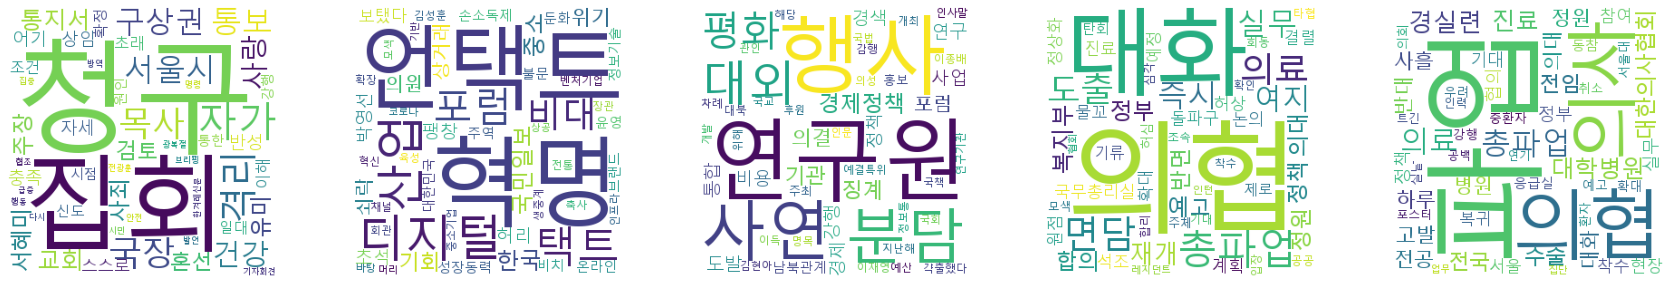

In [46]:
wordcloud = WordCloud(
    font_path="C:/windows/fonts/malgun.ttf", # 폰트 경로
    width = 300, 
    height = 300,
    max_words=50,
    background_color="white"
)


plt.figure(figsize=(30,5))

for i, index in enumerate( [100, 300, 600, 800, 930] ) :
    value = tfidf_matrix[index].toarray().squeeze()
    key = tfidf_vectorizer.get_feature_names()
    score = dict(zip(key, value))
    
    cloud = wordcloud.generate_from_frequencies(score)
    plt.subplot(1, 5, i+1)
    plt.imshow(cloud)
    plt.axis('off')
 
                 

## 수고하셨습니다. 😀